Dataset yang digunakan pada sesi 2 yaitu dataset segmentation-all.csv. unduh dataset pada link berikut : http://bit.ly/45VVB6X.

#### Lengkapi code yang hilang (yang ditandai dengan simbol "##########") dengan benar sehingga dapat ditampilkan nilai atau output yang diharapkan. Selesaikan semua langkah untuk poin maksimal! (20 poin).


# Feature Selection using Filters
### Metode filter digunakan dengan mengimpletasikan teorema :
1. Chi square statistic
2. Information Gain

In [13]:
# Import Packages

import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [4]:
# Import dataset
data = pd.read_csv("/content/segmentation-all.csv")
print(data.shape)
data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [8]:
# Mengitung data pada variabel target
data['Class'].value_counts()

BRICKFACE    330
SKY          330
FOLIAGE      330
CEMENT       330
WINDOW       330
PATH         330
GRASS        330
Name: Class, dtype: int64

Muat data , skalakan, dan split data menjadi data train (pelatihan) dan test
(pengujian). Metode Filter dilatih menggunakan data pelatihan dan
kemudian classifier dilatih pada subset fitur dan diuji pada set pengujian.

In [10]:
# Split data
y = data.pop('Class').values
X_raw = data.values

X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=1, test_size=1/2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

feature_names = data.columns
X_train.shape, X_test.shape

((1155, 19), (1155, 19))

### Feature Scores  
Tentukan skor chi-squared dan information gain untuk semua fitur
menggunakan set pelatihan (data test)

In [14]:
chi2_score, pval = chi2(X_train, y_train)
chi2_score = np.nan_to_num(chi2_score)
chi2_score
# The chi square scores for the features

array([ 14.99569813, 114.86161054,   0.        ,  13.47060858,
        27.33137409,  14.52455789,  20.00650221,  17.74732567,
        15.4768292 , 293.4360061 , 290.96380025, 303.47783064,
       290.11739498,  54.25395182, 111.01924229,  92.91780859,
       287.66891553,  81.64654774, 268.86221356])

In [15]:
i_scores = mutual_info_classif(X_train,y_train)
i_scores
# The i-gain scores for the features

array([0.13708356, 0.96162007, 0.        , 0.        , 0.04185   ,
       0.49310462, 0.32159384, 0.46411069, 0.36005734, 1.15990045,
       1.2084305 , 1.1057074 , 1.1312632 , 0.77400749, 0.91344794,
       0.96150467, 1.13966391, 0.92803809, 1.13387122])

Simpan skor dalam kerangka data yang diindeks berdasarkan nama fitur.

In [24]:
df=pd.DataFrame({'Mutual Info.':i_scores,'Chi Square':i_scores,'Feature':feature_names})
df.set_index('Feature', inplace = True)
df.sort_values('Mutual Info.', inplace = True, ascending = False)
df

,Mutual Info.,Chi Square
Feature,,
RAWRED-MEAN,1.208431,1.208431
INTENSITY-MEAN,1.159900,1.159900
VALUE-MEAN,1.139664,1.139664
HUE-MEAN,1.133871,1.133871
RAWGREEN-MEAN,1.131263,1.131263
RAWBLUE-MEAN,1.105707,1.105707
REGION-CENTROID-ROW,0.961620,0.961620
EXGREEN-MEAN,0.961505,0.961505
SATURATION-MEAN,0.928038,0.928038


### Plotting the Filter scores


NameError: ignored

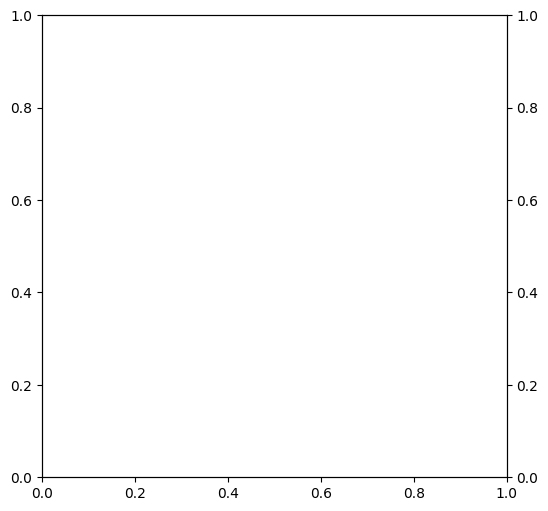

In [26]:
fig, ax = plt.subplots(figsize=(6,6))
rr = range(0,len(feature_names))
ax.plot = ax.twinx()
ax2.plot(df.index, df["Mutual Info."], label='I-Gain')
ax2.plot(df.index, df["Chi Square"], color='skyblue', label='Chi Squared')
ax2.plot.set_xticks(rr)

ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features', fontsize=12, fontweight='bold')
ax.set_ylabel('I-Gain')
ax2.set_ylabel('Chi Squared')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

In [ ]:
# Hitung korelasi
from scipy import stats
 "##########".spearmanr(chi2_score, i_scores)

SignificanceResult(statistic=0.9087719298245613, pvalue=7.322731801235527e-08)